In [1]:
# https://roboflow.com/
# 위사이트에서 바운딩박스 쉽게만들어줌

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# !gdown https://drive.google.com/uc?id=1-RBvPOYycsSpS7rVP0Pqwcbh18lZYDeb

In [4]:
# !unzip '/content/BBRegression.zip'

In [5]:
import glob
import xml.etree.ElementTree as ET

# 함수 가져오기 

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [6]:
IMAGE_PATH = '/content/BBRegression'

In [7]:
import os

FILE_NAME = 'label_cats.csv'

csv_path = os.path.join(IMAGE_PATH,'train')
xml_df = xml_to_csv(csv_path)
xml_to_csv(csv_path) 

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cat-2_jpg.rf.6b1b1624fe8ccd6c05c7d9b1935bb304.jpg,224,224,cat,36,9,159,123
1,cat-210_jpg.rf.d0f3c57f2d93b75a913b8ca95fe351b...,224,224,cat,20,8,206,190
2,cat-212_jpg.rf.6410693af68b7e92e7d9b6cece7538b...,224,224,cat,18,3,187,210
3,cat-227_jpg.rf.b0e39e49b4f074a8b151a2d130a1390...,224,224,cat,34,11,142,120
4,cat-111_jpg.rf.3a2689de6862347f22c8e43b13b0710...,224,224,cat,35,37,173,152
...,...,...,...,...,...,...,...,...
86,cat-276_jpg.rf.37f3284ff95a46a8a560b40c9ef9ae1...,224,224,cat,134,10,209,119
87,cat-225_jpg.rf.646ee7ec20a7675f3906e85bb56dcd7...,224,224,cat,77,8,199,133
88,cat-262_jpg.rf.cbd72d61059d051cbd2af2de3a91736...,224,224,cat,14,30,127,117
89,cat-145_jpg.rf.6c66f1740dddb55ac9992bcb1a04c82...,224,224,cat,47,1,208,93


In [8]:
xml_df.to_csv(FILE_NAME)

In [9]:
xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  91 non-null     object
 1   width     91 non-null     int64 
 2   height    91 non-null     int64 
 3   class     91 non-null     object
 4   xmin      91 non-null     int64 
 5   ymin      91 non-null     int64 
 6   xmax      91 non-null     int64 
 7   ymax      91 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 5.8+ KB


In [10]:
images = xml_df.iloc[:,0].values
images[:5]

array(['cat-2_jpg.rf.6b1b1624fe8ccd6c05c7d9b1935bb304.jpg',
       'cat-210_jpg.rf.d0f3c57f2d93b75a913b8ca95fe351b9.jpg',
       'cat-212_jpg.rf.6410693af68b7e92e7d9b6cece7538b2.jpg',
       'cat-227_jpg.rf.b0e39e49b4f074a8b151a2d130a13903.jpg',
       'cat-111_jpg.rf.3a2689de6862347f22c8e43b13b07102.jpg'],
      dtype=object)

In [11]:
points = xml_df.iloc[:,4:].values
points

array([[ 36,   9, 159, 123],
       [ 20,   8, 206, 190],
       [ 18,   3, 187, 210],
       [ 34,  11, 142, 120],
       [ 35,  37, 173, 152],
       [ 41,   2, 162, 146],
       [ 66,   4, 135, 114],
       [ 52, 142, 156, 224],
       [ 28,  32, 100, 130],
       [ 73,   2, 152, 102],
       [ 15,  12, 207, 173],
       [110,   1, 225, 113],
       [  6,  10,  66,  79],
       [ 23,  12, 183, 174],
       [ 59,  28, 215, 178],
       [ 10,   4, 118, 129],
       [ 67,  21, 178, 155],
       [ 24,   6, 178,  90],
       [ 42,   9, 201, 171],
       [ 53,   2, 140, 112],
       [103,   3, 216, 132],
       [ 33,   7, 148,  71],
       [ 85,  10, 194, 145],
       [ 34,   1, 204,  87],
       [ 82,  17, 150,  95],
       [  8,  11,  96, 161],
       [ 24,  32, 218, 163],
       [ 12,  39,  90, 134],
       [ 29,  34,  89, 146],
       [ 13,   7, 118, 109],
       [ 94,   4, 206, 128],
       [ 11,  13,  89, 112],
       [  8,   9,  69, 141],
       [ 50,  13, 199, 187],
       [ 17,  

### 시각화

In [12]:
import PIL

dataset_images = []
dataset_bbs = []

for file,point in zip(images,points) :
  f = os.path.join(IMAGE_PATH,'train',file)
  image = PIL.Image.open(f)
  arr = np.array(image)
  dataset_images.append(arr)
  dataset_bbs.append(point)

dataset_images = np.array(dataset_images)
dataset_bbs = np.array(dataset_bbs) 

In [13]:
# 4개 바운딩박스, 224,224,3 이미지 크기
dataset_bbs.shape,dataset_images.shape

((91, 4), (91, 224, 224, 3))

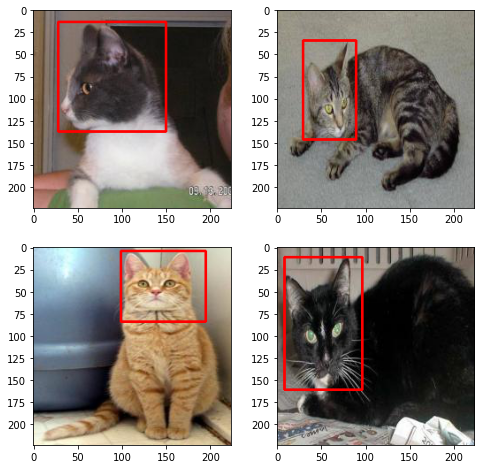

In [14]:
import cv2

samples = np.random.randint(dataset_images.shape[0],size=4)
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  # x,y x,y 로 묶을려고
  points = dataset_bbs[idx].reshape(2,2)
  
  img = cv2.rectangle(dataset_images[idx].copy(),
                      tuple(points[0]),
                      tuple(points[1]),
                      color=(255,0,0),
                      thickness=2)
  plt.subplot(2,2,i+1)
  plt.imshow(img)
plt.show()

In [15]:
np.savez('cat_bbs.npz',
         image=dataset_images,
         bbs=dataset_bbs)

In [16]:
dataset = np.load('cat_bbs.npz')

X = dataset['image']
y = dataset['bbs']

X.shape,y.shape

((91, 224, 224, 3), (91, 4))

### 검증데이터

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [18]:
X_train.shape,X_val.shape

((72, 224, 224, 3), (19, 224, 224, 3))

### 정규화 작업

In [19]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [20]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

In [21]:
from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(input_shape=(224,224,3),
                   include_top=False,)

base.trainable = False

model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

In [22]:
ckpt_path = './ckpt/cdats_bbs.ckpt'

ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weigths_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

In [23]:
EPOCHS = 50
BATCH_SIZE = 16
log = model.fit(
    X_train,y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val,y_val),
    callbacks=[ckpt_cb]
)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 6211.3145 - mse: 6211.3145   
Epoch 1: val_loss improved from inf to 2631.14990, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 24s 5s/step - loss: 6211.3145 - mse: 6211.3145 - val_loss: 2631.1499 - val_mse: 2631.1499
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 2639.7964 - mse: 2639.7964
Epoch 2: val_loss improved from 2631.14990 to 1750.69446, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 1467.0881 - mse: 1467.0881 - val_loss: 1750.6945 - val_mse: 1750.6945
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 1415.9280 - mse: 1415.9280
Epoch 3: val_loss improved from 1750.69446 to 864.07104, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 1428.4008 - mse: 1428.4008 - val_loss: 864.0710 - val_mse: 864.0710
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 605.0512 - mse: 605.0512
Epoch 4: val_loss improved from 864.07104 to 717.69232, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 596.0632 - mse: 596.0632 - val_loss: 717.6923 - val_mse: 717.6923
Epoch 5/50
1/5 [=====>........................] - ETA: 0s - loss: 433.6855 - mse: 433.6855
Epoch 5: val_loss improved from 717.69232 to 585.00256, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 453.2033 - mse: 453.2033 - val_loss: 585.0026 - val_mse: 585.0026
Epoch 6/50
1/5 [=====>........................] - ETA: 0s - loss: 151.3829 - mse: 151.3829
Epoch 6: val_loss did not improve from 585.00256
5/5 [==============================] - 0s 23ms/step - loss: 196.8931 - mse: 196.8931 - val_loss: 655.5698 - val_mse: 655.5698
Epoch 7/50
1/5 [=====>........................] - ETA: 0s - loss: 198.1582 - mse: 198.1582
Epoch 7: val_loss improved from 585.00256 to 443.91257, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 140.4090 - mse: 140.4090 - val_loss: 443.9126 - val_mse: 443.9126
Epoch 8/50
1/5 [=====>........................] - ETA: 0s - loss: 77.2346 - mse: 77.2346
Epoch 8: val_loss did not improve from 443.91257
5/5 [==============================] - 0s 21ms/step - loss: 87.0376 - mse: 87.0376 - val_loss: 457.7617 - val_mse: 457.7617
Epoch 9/50
1/5 [=====>........................] - ETA: 0s - loss: 48.1580 - mse: 48.1580
Epoch 9: val_loss did not improve from 443.91257
5/5 [==============================] - 0s 21ms/step - loss: 46.9754 - mse: 46.9754 - val_loss: 471.9156 - val_mse: 471.9156
Epoch 10/50
1/5 [=====>........................] - ETA: 0s - loss: 35.3325 - mse: 35.3325
Epoch 10: val_loss improved from 443.91257 to 429.64185, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 45.9080 - mse: 45.9080 - val_loss: 429.6418 - val_mse: 429.6418
Epoch 11/50
1/5 [=====>........................] - ETA: 0s - loss: 27.1481 - mse: 27.1481
Epoch 11: val_loss improved from 429.64185 to 420.17896, saving model to ./ckpt/cdats_bbs.ckpt


5/5 [==============================] - 18s 4s/step - loss: 21.7221 - mse: 21.7221 - val_loss: 420.1790 - val_mse: 420.1790
Epoch 12/50
1/5 [=====>........................] - ETA: 0s - loss: 18.5870 - mse: 18.5870
Epoch 12: val_loss did not improve from 420.17896
5/5 [==============================] - 0s 22ms/step - loss: 15.9122 - mse: 15.9122 - val_loss: 441.1704 - val_mse: 441.1704
Epoch 13/50
1/5 [=====>........................] - ETA: 0s - loss: 9.0618 - mse: 9.0618
Epoch 13: val_loss did not improve from 420.17896
5/5 [==============================] - 0s 21ms/step - loss: 11.5614 - mse: 11.5614 - val_loss: 443.9585 - val_mse: 443.9585
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 6.6319 - mse: 6.6319
Epoch 14: val_loss did not improve from 420.17896
5/5 [==============================] - 0s 24ms/step - loss: 6.6319 - mse: 6.6319 - val_loss: 428.4488 - val_mse: 428.4488
Epoch 15/50
1/5 [=====>........................] - ETA: 0s - loss: 5.5732 - mse: 5.5732
Epo

In [24]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val MSE')
  plt.legend()
  plt.show()

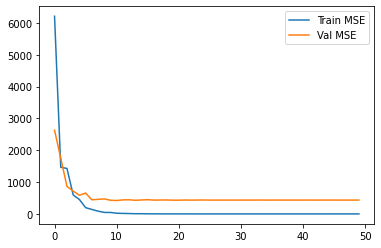

In [25]:
plot_history(log)

### 모델저장

In [26]:
# 1. keras 형태로 저장해서 주는방법

model.save('cats_bbs_regression.h5')

In [27]:
my_model = tf.keras.models.load_model('cats_bbs_regression.h5')
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

In [28]:
# 2. tensorflow

model.save('my_cats_model')

In [29]:
your_model = tf.keras.models.load_model('my_cats_model')

In [30]:
your_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
_____________________________________

In [32]:
y_pred = your_model.predict(X_val)

1/1 [==============================] - 1s 900ms/step


### 테스트
- 테스트 이미지 로딩
- 예측

In [35]:
fnames = glob.glob('/content/BBRegression/test'+'/*.jpg')

X_test = []

for f in fnames:
  image = PIL.Image.open(f)
  arr = np.array(image)
  X_test.append(arr)

X_test = np.array(X_test)

In [36]:
X_test = X_test.astype('float32')/255.

In [37]:
y_pred = model.predict(X_test).astype('int')

1/1 [==============================] - 1s 852ms/step


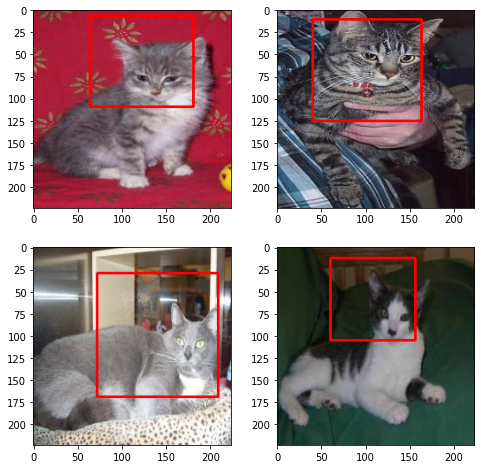

In [41]:
import cv2

samples = np.random.randint(11,size=4)
plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  # x,y x,y 로 묶을려고
  points = y_pred[idx].reshape(2,2)
  
  img = cv2.rectangle(X_test[idx].copy(),
                      tuple(points[0]),
                      tuple(points[1]),
                      color=(255,0,0),
                      thickness=2)
  plt.subplot(2,2,i+1)
  plt.imshow(img)
plt.show()